# General setup

In [1]:
# General setup
import numpy as np
import os
import os.path as op
import matplotlib.pyplot as plt
from langouEEG import *
from scipy.stats import *
from eeg_microstates3 import *
import pandas as pd
import time
import mne
import pickle
from mne.datasets import sample
from mne.datasets import fetch_fsaverage
from mpl_toolkits.mplot3d import Axes3D  # noqa
from langouMicrostates import *
from IPython.display import clear_output as clear
import logging
# import easyEEG

sample_data_folder = mne.datasets.sample.data_path()
# dataRoot = "/data/home/viscent/Light"
dataRoot = "/work/zhangyq/Light/"


# Download fsaverage files
fs_dir = fetch_fsaverage(verbose=True)
isMale = False
isAll = True
isBlind = False
if not isAll:
    result_dir = op.join(dataRoot,'result','male' if isMale else 'female')
else:
    result_dir = op.join(dataRoot,'result','all')
subjects_dir = op.dirname(fs_dir)
if not op.exists(result_dir):
    os.mkdir(result_dir)
# The files live in:


0 files missing from root.txt in /work/zhangyq/mne_data/MNE-fsaverage-data
0 files missing from bem.txt in /work/zhangyq/mne_data/MNE-fsaverage-data/fsaverage


# Read the data

In [2]:
%%capture
## Input EEG data and extarct epochs

epochs_4F = dict()
epochs_RF = dict()
epochs_4R = dict()
epochs_RR = dict()
#epochs_all = dict()


# tmin_rest, tmax_rest, tmin_flick,tmax_flick = 40, 60, 15, 30
# tmin_rest, tmax_rest, tmin_flick,tmax_flick = 40, 50, 15, 22
tmin_rest, tmax_rest, tmin_flick,tmax_flick = 5, 25, 5, 25
# tmin_R_flick, tmax_R_flick = 20, 25
# tmin_R_flick, tmax_R_flick = 20, 22
tmin_R_flick, tmax_R_flick = 5, 25

# Total 1-21
# 1-11 and 12-21
epoch_num = 0
for subject_name in range(1,21):
    if not isAll:
        if not (isMale ^ (subject_name in [7,8,11,17])):
            continue
    if subject_name<10:
        subject_name='S0'+str(subject_name)
    else:
        subject_name='S'+str(subject_name)
    with open(dataRoot+'/clean_data_av/'+subject_name+'_clean.lgeeg','rb') as f:
        raw=pickle.load(f)
    events, event_dict=extractEvents(raw)
    picks = mne.pick_types(raw.info, meg=False, eeg=True, stim=False, eog=False,
                        exclude='bads')

    epoch_RR,epoch_RF,epoch_4R,epoch_4F = extractEpochs_forall(raw,events,picks, 
    tmin_rest = tmin_rest,tmax_rest = tmax_rest,tmin_flick = tmin_flick,tmax_flick = tmax_flick)
    # 为啥搞两遍？
    ## A: 因为之前random与40Hz取的时间段不同，我写的垃圾代码只能传进一个tmin_flick
    ### Q: 我看也没区别啊
    #### A: 因为现在tmin,tmax是一样的，以前是不一样的
    _,epoch_RF,_,_ = extractEpochs_forall(raw,events,picks, 
    tmin_rest = tmin_rest,tmax_rest = tmax_rest,tmin_flick = tmin_R_flick,tmax_flick = tmax_R_flick)
    epochs_4F[subject_name]=epoch_4F
    epochs_RF[subject_name]=epoch_RF
    epochs_RR[subject_name]=epoch_RR
    epochs_4R[subject_name]=epoch_4R
    #epochs_all[epoch_num] = epoch_4R
    #epochs_all[epoch_num+1] = epoch_4F
    #epochs_all[epoch_num+2] = epoch_RF
 
    data_path = sample.data_path()

    picks = mne.pick_types(raw.info, meg=False, eeg=True, stim=False, eog=False,
                        exclude='bads')

    epoch_num += 3
    # Clear output display
    clear()

## Concact epochs
epoch_4F = mne.concatenate_epochs(list(epochs_4F.values()))
epoch_RF = mne.concatenate_epochs(list(epochs_RF.values()))
epoch_4R = mne.concatenate_epochs(list(epochs_4R.values()))
# epoch_all = mne.concatenate_epochs(list(epochs_all.values()))
# mne.epochs.equalize_epoch_counts([epoch_4F, epoch_RF, epoch_RR])

# Clear output display
clear()

# Concatenate all epochs in all conditions

In [3]:
epoch_all = mne.concatenate_epochs([epoch_4F, epoch_RF, epoch_4R])
epoch_dur = np.zeros((3))
epoch_dur = [epoch_4F.get_data().shape[0]*epoch_4F.get_data().shape[2],epoch_RF.get_data().shape[0]*epoch_RF.get_data().shape[2],epoch_4R.get_data().shape[0]*epoch_4R.get_data().shape[2]]
epoch_count = [epoch_4F.get_data().shape[0],epoch_RF.get_data().shape[0],epoch_4R.get_data().shape[0]]
epoch_size = epoch_all.get_data().shape[2]

Not setting metadata
Not setting metadata
302 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 1)
0 bad epochs dropped


# Do MS analysis

(3020302, 64)


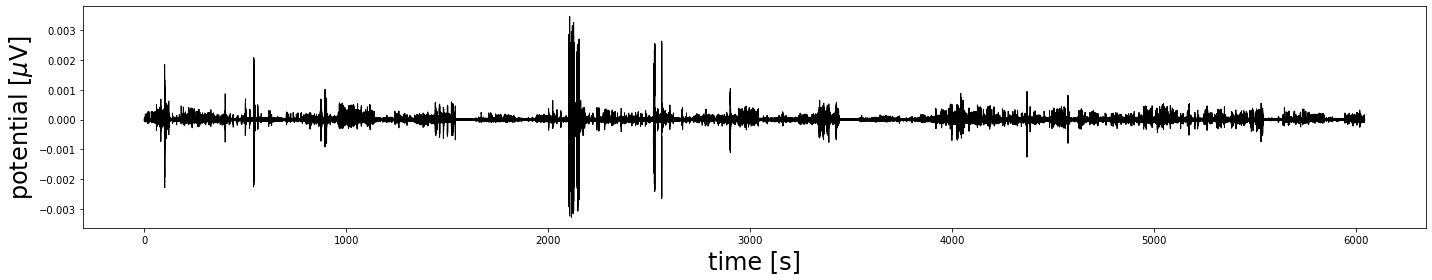

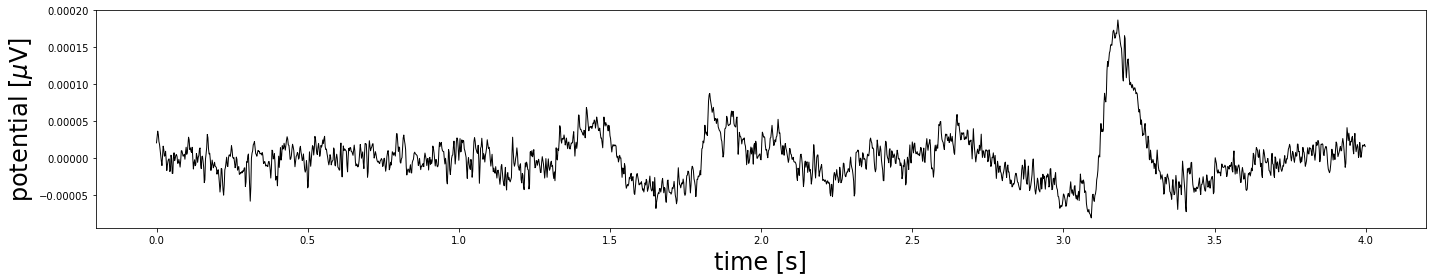

Clustering algorithm: kmeans
[+] Data format for clustering [GFP peaks, channels]: 792723 x 64

[+] Clustering algorithm: mod. K-MEANS.
	K-means run 1/5 converged after 10 iterations.
	K-means run 2/5 converged after 26 iterations.
	K-means run 3/5 converged after 20 iterations.
	K-means run 4/5 converged after 36 iterations.
	K-means run 5/5 converged after 28 iterations.
[+] Computation time: 113.77 sec

[+] Microstate back-fitting:
data_norm:  (3020302, 64)
data_cluster_norm:  (792723, 64)
maps:  (8, 64)

[+] Global explained variance GEV = 0.657
GEV_0: 0.029
GEV_1: 0.032
GEV_2: 0.149
GEV_3: 0.147
GEV_4: 0.049
GEV_5: 0.072
GEV_6: 0.167
GEV_7: 0.011

Empirical symbol distribution (RTT):

p_0 = 0.083
p_1 = 0.029
p_2 = 0.056
p_3 = 0.483
p_4 = 0.019
p_5 = 0.186
p_6 = 0.012
p_7 = 0.131

Empirical transition matrix:

|0.4540.0210.0420.2060.0220.1350.0100.111|
|0.0570.3430.0410.3040.0110.1450.0080.090|
|0.0650.0220.4770.2000.0320.1000.0290.075|
|0.0350.0180.0240.7670.0090.0820.0050.060|
|0

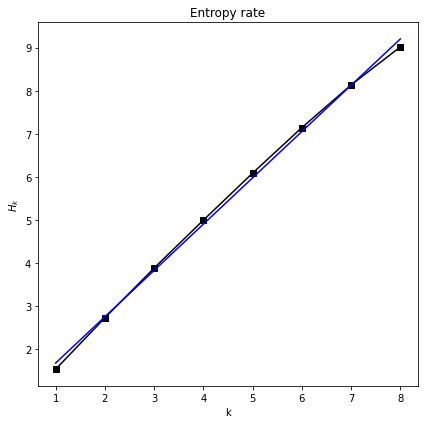


Empirical entropy rate h = 1.08
Theoretical MC entropy rate h = 1.19


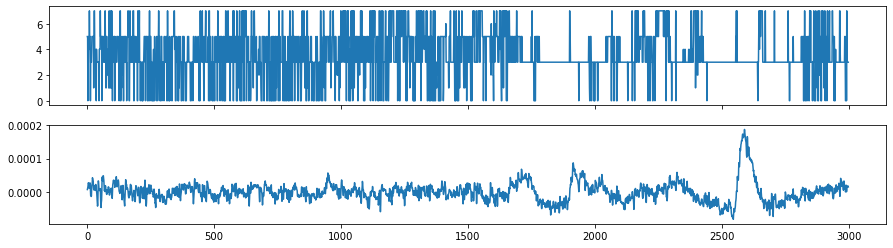

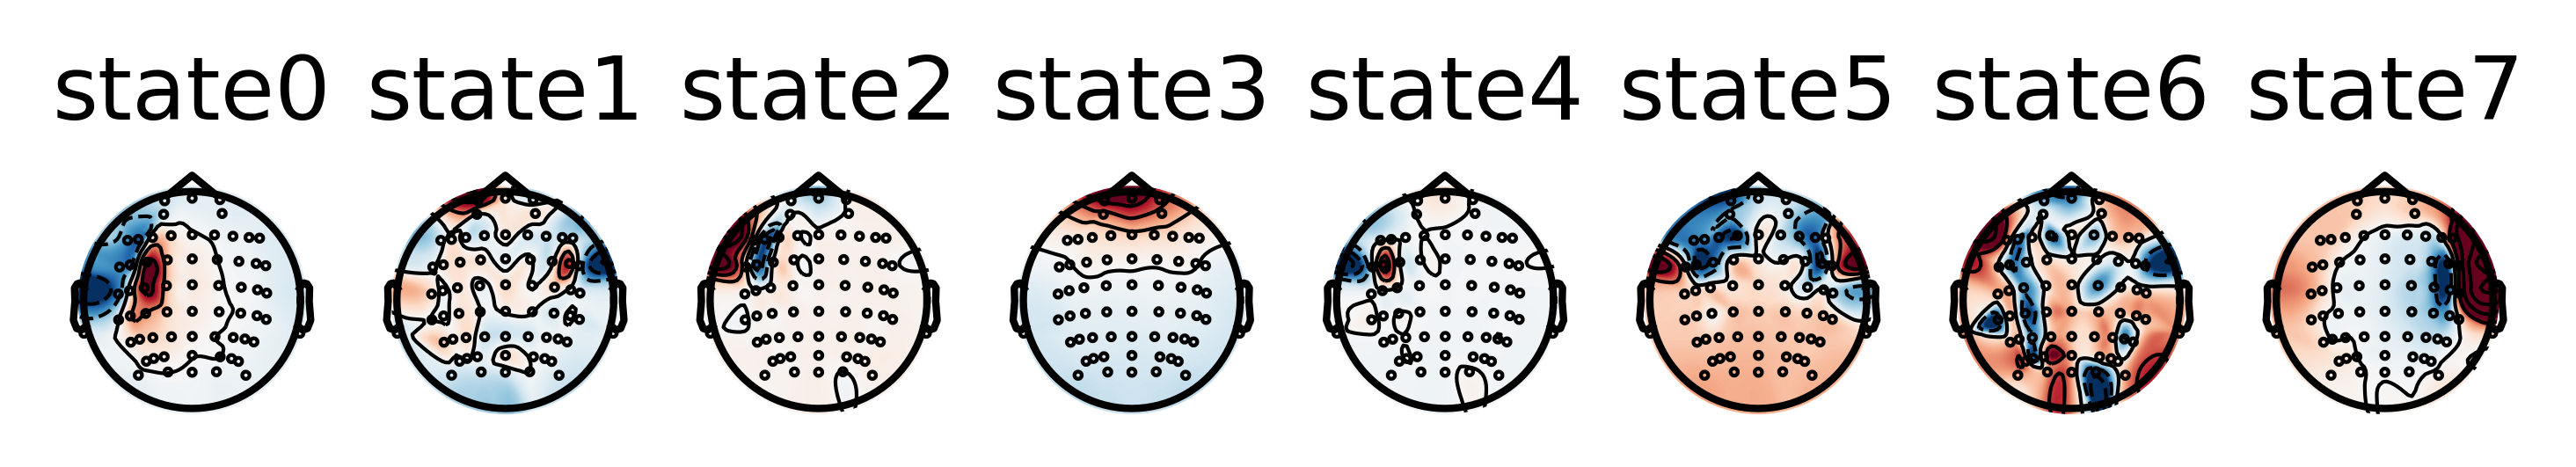

In [27]:
# epochs_order = list(epochs_4R.values())
# for i in list(epochs_4F.values()):
#     epochs_order.append(i)
# for i in list(epochs_RF.values()):
#     epochs_order.append(i)
# epoch_order = mne.concatenate_epochs(epochs_order)
epoch_order = epoch_all

dataRoot = "/work/zhangyq/Light/"

result_dir = dataRoot + "result/microstates"
tm = time.strftime("%Y_%m_%d_%H_%M_%S", time.localtime())
time_augs=[['min_rest','max_rest','min_flick','max_flick','min_random_flick','max_random_flick']
,[tmin_rest, tmax_rest, tmin_flick, tmax_flick, tmin_R_flick, tmax_R_flick]]

# Args to save MS result
save = False
to_save_cache = False
save_log = False

from langouEEG import *
# mode: "aahc", "kmeans", "kmedoids", "pca", "ica"
vars_all = display_maps(epoch_order, n_maps=8, save=save, dpi=600, filename='all',
fmt='.png', to_save_cache=to_save_cache, time_augs=time_augs, tm=tm, result_dir=result_dir,
calc_lzc=False, epochs=epoch_order,save_log=save_log, f_lo=1, f_hi=200, mode=1)

# Wash the data, seperate the data according to different conditions

In [28]:
# maps = vars_all[0]

In [29]:
# ABCD_ = input("Please input the ABCD sequence, e.g.: 0,1,2,3").split(',')
# ABCD = [int(ABCD_[i]) for i in range(len(ABCD_))]
# state_A = maps[ABCD[0]]
# state_B = maps[ABCD[1]]
# state_C = maps[ABCD[2]]
# state_D = maps[ABCD[3]]

In [30]:
# np.save(result_dir+'/state_A.npy',state_A)
# np.save(result_dir+'/state_B.npy',state_B)
# np.save(result_dir+'/state_C.npy',state_C)
# np.save(result_dir+'/state_D.npy',state_D)

In [31]:
import math
from numba import jit,vectorize
@jit(nopython=True,parallel=True)
def GMD(u,v):
    u_bar = np.mean(u)
    v_bar = np.mean(v)
    n = u.shape[0]
    sigma_diff = 0
    for i in range(n):
        a = 0
        b = 0
        for j in range(n):
            a += ((u[j]-u_bar)**2)/n
            b += ((v[j]-v_bar)**2)/n
        a = math.sqrt(a)
        b = math.sqrt(b)
        if a == 0 or b == 0:
            return 1
        a = (u[i]-u_bar)/a
        b = (v[i]-v_bar)/b
        sigma_diff += (a-b)**2
    return math.sqrt(sigma_diff/n)
GMD_mat = np.zeros((8,8))
for i in range(8):
    for j in range(8):
        GMD_mat[i,j] = GMD(maps[i],maps[j])
def pGMD(u,v):
    return GMD_mat[u,v]
def GFP(x):
    ret = np.zeros(x.shape[1])
    for i in range(x.shape[1]):
        ret[i] = np.std(x[:,i])
    return ret

In [32]:
# maps = vars_all[0]
# temp = np.zeros((maps.shape[0]))
# state_A = np.load(result_dir+'/state_A.npy')
# for i in range(maps.shape[0]):
#     temp[i] = abs(GMD(maps[i],state_A)-1)
# idx_A = temp.argmax()

# temp = np.zeros((maps.shape[0]))
# state_B = np.load(result_dir+'/state_B.npy')
# for i in range(maps.shape[0]):
#     temp[i] = abs(GMD(maps[i],state_B)-1)
# idx_B = temp.argmax()

# temp = np.zeros((maps.shape[0]))
# state_C = np.load(result_dir+'/state_C.npy')
# for i in range(maps.shape[0]):
#     temp[i] = abs(GMD(maps[i],state_C)-1)
# idx_C = temp.argmax()

# temp = np.zeros((maps.shape[0]))
# state_D = np.load(result_dir+'/state_D.npy')
# for i in range(maps.shape[0]):
#     temp[i] = abs(GMD(maps[i],state_D)-1)
# idx_D = temp.argmax()
# map_idx = np.array([idx_A,idx_B,idx_C,idx_D])
# map_canonical = np.array([state_A,state_B,state_C,state_D])


In [33]:
# print(map_canonical)

In [34]:
def reject_short(x):
    u = 0
    v = 1
    x_prev = x[0]
    rej_count = 0
    rej_tot = 0
    dur = []
    while True:
        while v<=x.shape[0]:
            if v > x.shape[0]-1:
                break
            if x[v]!=x_prev:
                if v-u < 15:
                    for i in range(u,v):
                        x[i] = 8
                dur.append(v-u)
                x_prev = x[v]
                u = v
                v += 1
            else:
                v += 1
        u = 0
        v = 1
        rej_count=np.sum(np.where(x==8,1,0))
        print(rej_count)
        rej_tot+=rej_count
        while v<=x.shape[0]:
            if v > x.shape[0]-1:
                break
            if x[v] == 8:
                u = v
                while v < x.shape[0]:
                    if x[v]!=8:
                        break
                    else:
                        v+=1
                mid = math.floor(u+(v-u)/2)
                if mid>x.shape[0] or v > x.shape[0]-1:
                    break
                for i in range(u,mid):
                    x[i] = x[u-1]
                for i in range(mid,v):
                    x[i] = x[v]
                u=v-1
            else:
                v += 1
        if rej_count < 3:
            x[np.where(x==8)]=0
            x[np.where(x>3)]=0
            break
    x[np.where(x==8)]=0
    # x[np.where(x>3)]=0
    return x,rej_tot

In [35]:
# return maps, x, gfp_peaks, gev, data, pca1
x = vars_all[1].copy()
gfp = vars_all[2].copy()
gfp_l = np.zeros(x.shape[0])
gfp_l[gfp] = 1
x_4F = vars_all[1][0:epoch_dur[0]]
x_RF = vars_all[1][epoch_dur[0]:epoch_dur[0]+epoch_dur[1]]
x_4R = vars_all[1][epoch_dur[0]+epoch_dur[1]:epoch_dur[0]+epoch_dur[1]+epoch_dur[2]]

In [36]:
""" reject_rate = rej_tot/x.shape[0]
print(rej_tot)
print(str(reject_rate)+' data rejected for too short duration ( < 30ms)') """

" reject_rate = rej_tot/x.shape[0]\nprint(rej_tot)\nprint(str(reject_rate)+' data rejected for too short duration ( < 30ms)') "

In [37]:

def backfit(x):
    if np.isin(x,map_idx):
        for i in range(map_idx.shape[0]):
            if x == map_idx[i]:
                ret = i
    else:
        temp_GMD = np.zeros(map_idx.shape[0])
        for i in range(map_canonical.shape[0]):
            temp_GMD[i] = abs(pGMD(x,map_idx[i])-1)
        ret = temp_GMD.argmax()
    return ret
vbackfit = np.vectorize(backfit)

@jit(nopython=True,parallel=True)
def ebackfit(x,map_idx,map_canonical,epoch_map):
    flag = False
    for i in range(4):
        if x == map_idx[i]:
            flag = True
            break
    if flag:
        for i in range(map_idx.shape[0]):
            if x == map_idx[i]:
                ret = i
    else:
        temp_GMD = np.zeros(map_idx.shape[0])
        for i in range(map_canonical.shape[0]):
            temp_GMD[i] = abs(GMD(epoch_map,map_canonical[i])-1)
        ret = temp_GMD.argmax()
    return ret


In [38]:
epoch_4F_flat = np.zeros((64,epoch_4F.get_data().shape[0]*epoch_4F.get_data().shape[2]),dtype=np.int16)
epoch_RF_flat = np.zeros((64,epoch_RF.get_data().shape[0]*epoch_RF.get_data().shape[2]),dtype=np.int16)
epoch_4R_flat = np.zeros((64,epoch_4R.get_data().shape[0]*epoch_4R.get_data().shape[2]),dtype=np.int16)
for i in range(epoch_4F.get_data().shape[0]):
    epoch_4F_flat[:,i*epoch_4F.get_data().shape[2]:(i+1)*epoch_4F.get_data().shape[2]] = epoch_4F.get_data()[i,:,:]
for i in range(epoch_RF.get_data().shape[0]):
    epoch_RF_flat[:,i*epoch_RF.get_data().shape[2]:(i+1)*epoch_RF.get_data().shape[2]] = epoch_RF.get_data()[i,:,:]
for i in range(epoch_4R.get_data().shape[0]):
    epoch_4R_flat[:,i*epoch_4R.get_data().shape[2]:(i+1)*epoch_4R.get_data().shape[2]] = epoch_4R.get_data()[i,:,:]
epoch_4F_flat = epoch_4F_flat.transpose(1,0)
epoch_RF_flat = epoch_RF_flat.transpose(1,0)
epoch_4R_flat = epoch_4R_flat.transpose(1,0)
print(epoch_4F_flat.shape)

(1020102, 64)


In [ ]:
# from tqdm import trange
# x_clean_4F = np.zeros((x_4F.shape[0]),dtype=np.int16)
# for i in trange(x_4F.shape[0]):
#     x_clean_4F[i] = ebackfit(x_4F[i],map_idx,map_canonical,epoch_4F_flat[i])

# x_clean_RF = np.zeros((x_RF.shape[0]),dtype=np.int16)
# for i in trange(x_RF.shape[0]):
#     x_clean_RF[i] = ebackfit(x_RF[i],map_idx,map_canonical,epoch_RF_flat[i])

# x_clean_4R = np.zeros((x_4R.shape[0]),dtype=np.int16)
# for i in trange(x_4R.shape[0]):
#     x_clean_4R[i] = ebackfit(x_4R[i],map_idx,map_canonical,epoch_4R_flat[i])

In [ ]:
# x_clean_4F_nr = x_clean_4F.copy()
# x_clean_RF_nr = x_clean_RF.copy()
# x_clean_4R_nr = x_clean_4R.copy()

In [40]:
x_4F_nr = x_4F.copy()
x_RF_nr = x_RF.copy()
x_4R_nr = x_4R.copy()

In [41]:
x_4F,rej_tot = reject_short(x_4F)
reject_rate = rej_tot/x.shape[0]
print(rej_tot)
print(str(reject_rate)+' data rejected for too short duration ( < 30ms)')
x_RF,rej_tot = reject_short(x_RF)
reject_rate = rej_tot/x.shape[0]
print(rej_tot)
print(str(reject_rate)+' data rejected for too short duration ( < 30ms)')
x_4R,rej_tot = reject_short(x_4R)
reject_rate = rej_tot/x.shape[0]
print(rej_tot)
print(str(reject_rate)+' data rejected for too short duration ( < 30ms)')

800482
786
393
197
99
50
25
13
7
4
2
802058
0.2655555636489331 data rejected for too short duration ( < 30ms)
769755
13
7
4
2
769781
0.2548688839725299 data rejected for too short duration ( < 30ms)
742248
1
742249
0.24575323924561188 data rejected for too short duration ( < 30ms)


In [ ]:
# x_clean_4F,rej_tot = reject_short(x_clean_4F)
# reject_rate = rej_tot/x.shape[0]
# print(rej_tot)
# print(str(reject_rate)+' data rejected for too short duration ( < 30ms)')
# x_clean_RF,rej_tot = reject_short(x_clean_RF)
# reject_rate = rej_tot/x.shape[0]
# print(rej_tot)
# print(str(reject_rate)+' data rejected for too short duration ( < 30ms)')
# x_clean_4R,rej_tot = reject_short(x_clean_4R)
# reject_rate = rej_tot/x.shape[0]
# print(rej_tot)
# print(str(reject_rate)+' data rejected for too short duration ( < 30ms)')

## Plotting

In [ ]:
dataRoot = "/work/zhangyq/Light/"
result_dir = dataRoot + "result/microstates"
save_folder = result_dir + '/cache/' + tm

save_MS_time_figs = True

fig, ax = plt.subplots()
u=2000
prev = x_clean_4F[0]
color_dict = {0:'red',1:'blue',2:'green',3:'orange'}
print()
for v in range(2001,4000):
    if x_clean_4F[v] != prev:
        ax.fill_between(np.arange(u,v),GFP(epoch_4F.get_data()[1,:,u:v]),color=color_dict[prev])
        prev = x_clean_4F[v]
        u=v
if save_MS_time_figs:
    plt.savefig('save_folder/MS_time_fig.png', dpi=600)
plt.show()

In [ ]:
# for i in range(2000,4000):
#     temp_max = -1
#     for j in range(4):
#         if abs(GMD(epoch_4F.get_data()[0,:,i],map_canonical[j])-1) > temp_max:
#             temp_max = abs(GMD(epoch_4F.get_data()[0,:,i],map_canonical[j])-1)
#     if temp_max > 0.9:
#         plot_topomap(epoch_4F.get_data()[0,:,i], epoch_4F.info)

# Quantitative analysis
## Coverage

## LZC

In [42]:
epoch_minimum = np.min(epoch_count)
def eLZC(x):
    strx = ''
    prev = x[0]
    for a in x[1:]:
        if a != prev:
            strx += str(prev)
            prev = a
    # print(len(strx))
    return lempel_ziv_complexity(strx)

In [54]:
lzc_4F = np.zeros((epoch_minimum))
for i in range(epoch_minimum):
    lzc_4F[i] = eLZC(x_4F_nr[i*epoch_size:(i+1)*epoch_size])
lzc_RF = np.zeros((epoch_minimum))
for i in range(epoch_minimum):
    lzc_RF[i] = eLZC(x_RF_nr[i*epoch_size:(i+1)*epoch_size])
lzc_4R = np.zeros((epoch_minimum))
for i in range(epoch_minimum):
    lzc_4R[i] = eLZC(x_4R_nr[i*epoch_size:(i+1)*epoch_size])

In [55]:
np.savetxt(result_dir+'/lzc_4F.csv',lzc_4F)
np.savetxt(result_dir+'/lzc_RF.csv',lzc_RF)
np.savetxt(result_dir+'/lzc_4R.csv',lzc_4R)

In [56]:
pval_lzc = np.zeros(3)
pval_lzc[0] = ttest_ind(lzc_4F,lzc_4R)[1]
pval_lzc[1] = ttest_ind(lzc_RF,lzc_4R)[1]
pval_lzc[2] = ttest_ind(lzc_4F,lzc_RF)[1]

In [57]:
print(pval_lzc)

[0.01130665 0.02138114 0.77519628]
